In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def get_array(d):
#     while True:
    arr = np.random.randn(d,)
#         norm= np.linalg.norm(arr)
#         if norm <= 1:
    return list(arr/3)

In [3]:
def get_x(n,d):
    x=[]
    for _ in range(n):
        z=get_array(d)
        x.append(z)
    #print(x)
    x_mean=np.mean(x,axis=0)
    return x,x_mean
#x_mean list represents average of x in each client
#print(x_mean)

In [4]:
n=16
d=512
iters=20
x,x_mean= get_x(n,d)
#x_mean

In [5]:
def encoder(x,n,d,k):
    B=[]
    v=[]
    for i in range(n):
        u=x[i]
        x_min=np.min(u)
        x_max=np.max(u)
        s=x_max-x_min
        B_=np.linspace(x_min,x_max,num=k)
        v_=np.searchsorted(B_,u,side='right')-1   
        v.append(v_.tolist())
        B_client=np.append(B_,0)
        B.append(B_client.tolist())
        
    return B,v
            

In [6]:
def decoder(B,v,x,d):
    Y=[]
    sum1=0
    for i in range(n):
        u=x[i]
        x_max=np.max(u)
        x_min=np.min(u)
        y=[]
        for j in range(d):
            #B[j]=B(r)
            y_est=0
            r=v[i][j]
            z=B[i][r]
            w=B[i][r+1]
            p=(u[j]-z)/(w-z)
            sum1 +=((w-u[j])*(u[j]-z))                
            y_est=random.choices([w,z],[p,1-p])[0]
            y.append(y_est)   
        Y.append(y)
    return Y,sum1

In [7]:
def loss_k(k1):
    loss=0
    sum2=0
    k=2**k1
    for _ in range(iters):
        
        sum_est_mean=0
        sum_est=0
        sum1 = 0
        B,v=encoder(x,n,d,k)
        #print(B,v)
        Y,sum1=decoder(B,v,x,d)
        sum2+=sum1
        x_mean_est=np.mean(Y,axis=0)
        
        error=np.subtract(x_mean_est,x_mean)
        loss+=(np.linalg.norm(error))**2
        
    return (loss/iters),(sum2/(iters*(n**2)))


In [8]:
losses=[]
calc_losses=[]

for k in range(1,9):
    
    calc_loss,theoretical_loss=loss_k(k)
    losses.append(calc_loss)
    calc_losses.append(theoretical_loss)

In [9]:
print(losses)
print(calc_losses)

[7.983353418030556, 0.6653651710394798, 0.11858633188051118, 0.026873788962442264, 0.0065496977049069455, 0.001570688624849266, 0.00038241615127791365, 9.44888243837992e-05]
[7.88608286127186, 0.6766330027775901, 0.12237982318342029, 0.02709435801111061, 0.006343456397426638, 0.0015270918899300365, 0.00038158855742930316, 9.431451918024684e-05]


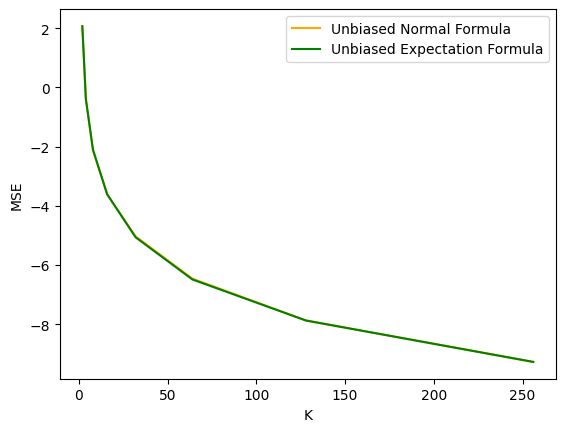

In [11]:
plt.plot(2**np.arange(1,9),np.log(losses),color="orange",label='Unbiased Normal Formula')
plt.plot(2**np.arange(1,9),np.log(calc_losses),color="g",label='Unbiased Expectation Formula')
plt.xlabel("K")
plt.ylabel("MSE")
plt.legend()
plt.savefig("Unbiased_Used_Formula_vs_Unbiased_Theoretical_Formula.pdf")
plt.show()